In [131]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)

## Data

Reference:

Elsafti, A. M., van Berlaer, G., Al Safadi, M., Debacker, M., Buyl, R., Redwan, A., & Hubloue, I. (2016). Children in the Syrian Civil War: the Familial, Educational, and Public Health Impact of Ongoing Violence. Disaster Medicine and Public Health Preparedness, 10(6), 874–882. doi:10.1017/dmp.2016.165

In [142]:
data = pd.read_excel('data.xlsx', index_col=None)

In [143]:
df_clean = data.dropna()

In [144]:
df_clean = df_clean.drop(columns=['vacc_miss_MMR', 'vacc_miss_DTP', 'vacc_miss_HBV', 'vacc_miss_TB', 'vacc_miss_pol', 'educ_prov'])

In [145]:
df_clean.head()

,gender,displ,own_house,Safe_water,Appr_sanit,nutr_avail,nutr_safe,clin_maln,spec_HC_prov,vacc_avail,vacc_compl,vacc-UTD,vacc_miss,vacc_miss_other,rec_educ
0,0,0.0,1,1,1,1,1,0,0,0,1,2,0,0,0
1,1,0.0,1,1,1,1,0,0,0,2,0,2,1,0,2
2,1,0.0,1,1,1,1,1,0,0,0,1,2,0,0,0
3,1,0.0,1,1,1,0,0,0,0,0,1,2,0,0,3
4,0,0.0,1,1,1,1,0,1,2,2,0,2,1,0,0


In [146]:
print(df_clean.dtypes)

gender               int64
displ              float64
own_house            int64
Safe_water           int64
Appr_sanit           int64
nutr_avail           int64
nutr_safe            int64
clin_maln            int64
spec_HC_prov         int64
vacc_avail           int64
vacc_compl           int64
vacc-UTD             int64
vacc_miss            int64
vacc_miss_other      int64
rec_educ             int64
dtype: object


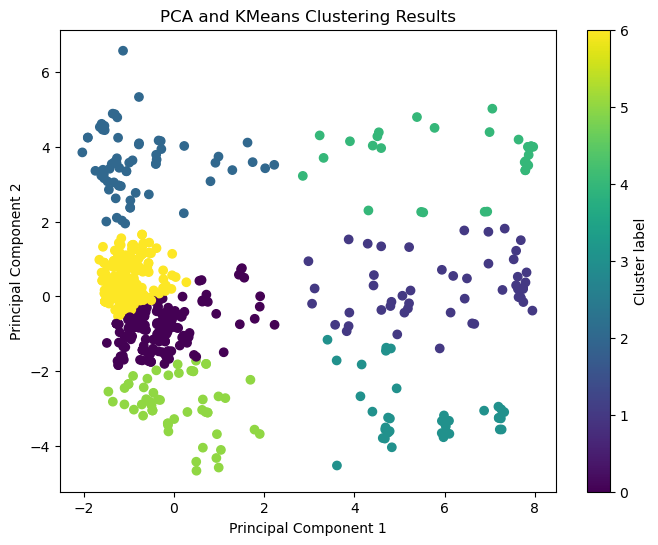

In [147]:
object_columns = data.select_dtypes(include='object').columns
{column: data[column].unique() for column in object_columns}

for column in object_columns:
    data[column] = pd.to_numeric(data[column], errors='coerce')

imputer = SimpleImputer(strategy='median')
data_imputed = imputer.fit_transform(data)

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_imputed)

pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

kmeans = KMeans(n_clusters=7, random_state=42)
clusters = kmeans.fit_predict(data_pca)

plt.figure(figsize=(8, 6))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c = clusters, marker='o')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA and KMeans Clustering Results')
plt.colorbar(label='Cluster label')
plt.show()

In [165]:
n_samples = 5000
n_features = 20  
centers = 5  
cluster_std = 5
noise_level = 5

X, y = make_blobs(n_samples=n_samples, n_features=n_features, centers=centers, cluster_std=cluster_std, random_state=42)

noise = np.random.normal(0, noise_level, X.shape)
X_noisy = X + noise

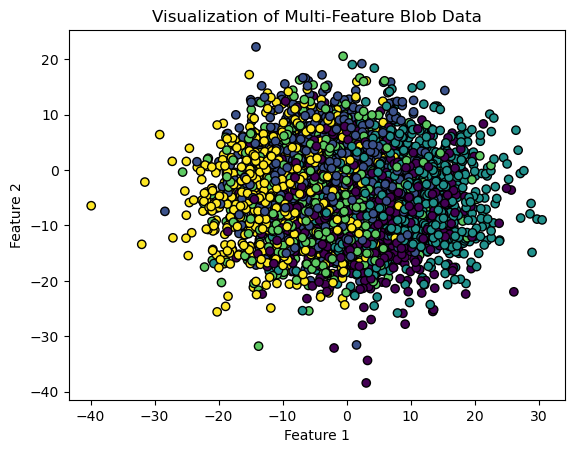

In [166]:
plt.scatter(X_noisy[:, 3], X_noisy[:, 4], c=y, cmap='viridis', marker='o', edgecolor='k')
plt.title('Visualization of Multi-Feature Blob Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [167]:
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(X_noisy)

scaler = StandardScaler()
data_scaled = scaler.fit_transform(X_noisy)

result = (data_scaled > 0).astype(int)

pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

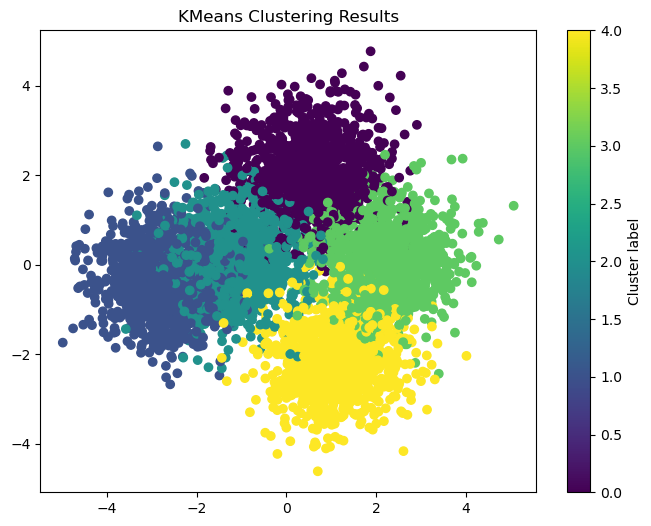

In [168]:
plt.figure(figsize=(8, 6))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c = clusters, marker='o')
plt.title('KMeans Clustering Results')
plt.colorbar(label='Cluster label')
plt.show()

In [169]:
Xy = np.column_stack((result, clusters))

column_names = [f'Feature_{i+1}' for i in range(n_features)] + ['Label']
df = pd.DataFrame(Xy, columns=column_names)

df.to_csv('synthetic_blob_data.csv', index=False)

In [170]:
clusters

array([4, 3, 3, ..., 1, 3, 0], dtype=int32)

In [171]:
result

array([[0, 0, 1, ..., 1, 1, 1],
       [1, 0, 0, ..., 0, 1, 1],
       [1, 0, 0, ..., 0, 1, 0],
       ...,
       [1, 1, 0, ..., 0, 1, 0],
       [1, 0, 0, ..., 1, 1, 1],
       [0, 1, 0, ..., 0, 0, 1]])

In [172]:
X_train, X_test, y_train, y_test = train_test_split(result, clusters, test_size = 0.2, random_state = 42)

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

report = classification_report(y_test, y_pred, zero_division=0, output_dict=True)

In [173]:
df_report = pd.DataFrame(report).transpose()
print(df_report)

              precision    recall  f1-score   support
0              0.921053  0.921053  0.921053   190.000
1              0.905660  0.969697  0.936585   198.000
2              0.934673  0.857143  0.894231   217.000
3              0.870647  0.916230  0.892857   191.000
4              0.914141  0.887255  0.900498   204.000
accuracy       0.909000  0.909000  0.909000     0.909
macro avg      0.909235  0.910276  0.909045  1000.000
weighted avg   0.909923  0.909000  0.908729  1000.000
